Question 3 – Programming (20 points):

Design a genetic algorithm to solve the polynomial fitting problem that we did in Homework #1.
You need to implement a genetic algorithm using BOTH mutation AND crossover operations. You
need to decide a mutation rate and a crossover rate.

Plot the following in one figure: 

1.   the original noisy data
2.   the polynomial you obtained in
Homework #1, and 
3.   the polynomial obtained from this implementation. 

Compare and discussion the difference in performance of the two polynomials obtained with two different
methods.

<ipython-input-305-9ec0737cd78c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


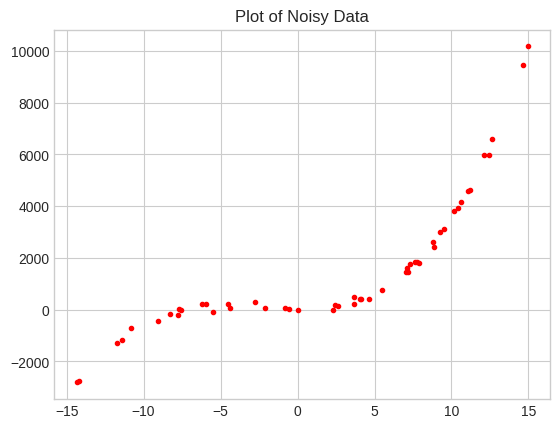

In [305]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'r.')
plt.title("Plot of Noisy Data")
plt.show()


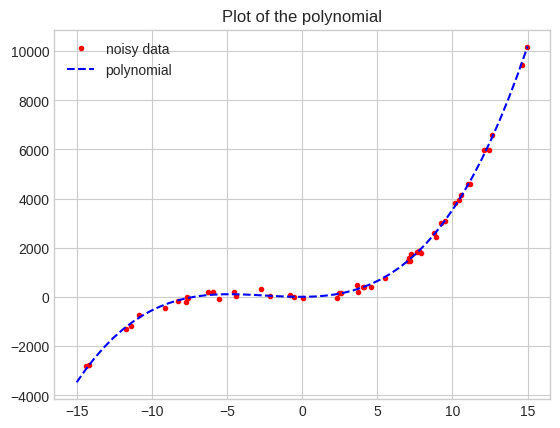

In [306]:
# Taking m = 3
z = np.polyfit(x.flatten(),y.flatten(),3)
p = np.poly1d(z)
x2 = np.linspace(-15,15,50)

plt.plot(x.flatten(),y.flatten(),'r.',x2,p(x2),'b--')

plt.title('Plot of the polynomial')
plt.legend(['noisy data','polynomial'])

In [266]:
# Define the fitness function
def fitness_function(coef, x, y):
    y_pred = np.polyval(coef, x)
    return (np.square(y - y_pred).mean())

In [289]:
# Define the genetic algorithm
def genetic_algorithm(pop_size, num_genes, generations, mutation_rate, crossover_rate, x, y):
    # Initialize the population
    population = np.random.randint(low=0, high=15, size=(pop_size, num_genes))
    # print(population)
    best_fitness = np.inf
    best_individual = None
    
    # Loop over generations
    for gen in range(generations):
        # Evaluate fitness
        fitness = np.array([fitness_function(coef, x, y) for coef in population])
        
        # Select parents
        fitness_norm = fitness / np.sum(fitness)
        parent_idx = np.random.choice(pop_size, size=pop_size, p=fitness_norm)
        parents = population[parent_idx]
        
        
        # Crossover
        for i in range(pop_size):
            if np.random.uniform(0.0,1.0) <= crossover_rate:
                j = np.random.randint(0,3)
                cross_point = np.random.randint(num_genes)
                offspring = np.concatenate([parents[i, :cross_point], parents[j, cross_point:]])
                population[i] = offspring
        
        # Mutation
        for i in range(pop_size):
            if np.random.uniform(0.0,1.0) <= mutation_rate:
                population[i] = population[i] + np.random.normal(loc=0, scale=1, size=num_genes)
                # print(population[i])
                
        # Keep track of the best individual
        idx = np.argmin(fitness)
        if fitness[idx] < best_fitness:
            # print(fitness, idx)
            best_fitness = fitness[idx]
            best_individual = population[idx]
    
    # print(best_individual)
    # print(fitness)
    # print(fitness[idx])
          
    return best_individual

Best coefficients: [24  5  1  0]


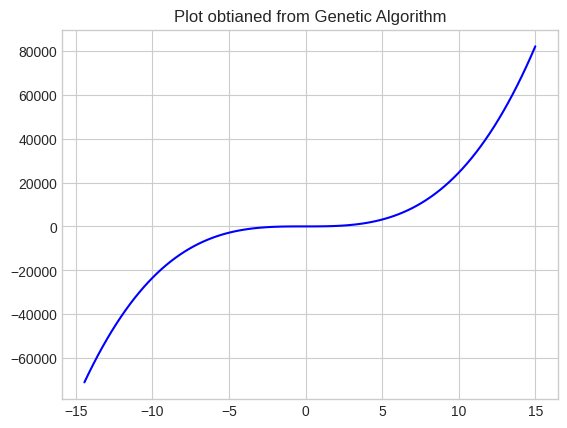

In [304]:
# Test the genetic algorithm with different parameters
best_coef = genetic_algorithm(pop_size=100, num_genes=4, generations=500, mutation_rate=0.01, crossover_rate=0.9, x=x, y=y)
print("Best coefficients:", best_coef)

# Plot the result
x_plot = np.linspace(np.min(x), np.max(x), 100)
y_plot = np.polyval(best_coef, x_plot)
plt.plot(x_plot, y_plot, 'b-')
plt.title("Plot obtianed from Genetic Algorithm")
plt.show()


The plots above represent the polynomials obtained from three methods, i.e.

* Given Polynomial
* Using Polyfit
* Using Genetic Algorithm

It is evident that the plot obtained from the genertic algorithm implementation is similar to the original plot with noise and that the implementation was successful. However it is observed that the time taken to get the result using genetic algorithm is longer than other methods.